### Download IRIS Data  from https://storage.googleapis.com/

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
import datetime

def load_iris_data():
    train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
    train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                               origin=train_dataset_url)
    print("Local copy of the dataset file: {}".format(train_dataset_fp))

    # column order in CSV file
    column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

    feature_names = column_names[:-1]
    label_name = column_names[-1]

    #print("Features: {}".format(feature_names))
    #print("Label: {}".format(label_name))

    class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

    batch_size = 120

    train_dataset = tf.data.experimental.make_csv_dataset(
        train_dataset_fp,
        batch_size,
        column_names=column_names,
        label_name=label_name,
        num_epochs=1)

    features, labels = next(iter(train_dataset))
    """
    #print(features)
    plt.scatter(features['petal_length'],
                features['sepal_length'],
                c=labels,
                cmap='viridis')

    plt.xlabel("Petal length")
    plt.ylabel("Sepal length")
    plt.show()
    """

    def pack_features_vector(features, labels):
      """Pack the features into a single array."""
      features = tf.stack(list(features.values()), axis=1)
      return features, labels

    train_dataset = train_dataset.map(pack_features_vector)
    features, labels = next(iter(train_dataset))
    
    return features, labels

### IRIS data is stored in numpy arrays

- x_data: 4D features in  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
- y_data: class = { 0: 'Iris setosa', 1: 'Iris versicolor', 2: 'Iris virginica'}

In [ ]:
features, labels = load_iris_data()
x_data = features.numpy()
y_data = labels.numpy()


Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


### Programming (1): Draw Petal length vs Sepal length

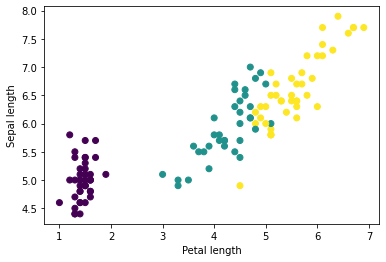

In [ ]:
# Program here by yourself

plt.scatter(x_data[:,2],
                x_data[:,0],
                c=y_data,
                cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

**data 120개**
**x_data[0:121,2] = petal lengh**
**x_data[0:121,0] = sepal lengh**

In [ ]:
# Program here by yourself
num_sample = len(y_data)
num_train = (7*num_sample)//10
num_test = num_sample-num_train

max_sepal_length = abs(x_data[:, 0]).max()
max_sepal_width = abs(x_data[:, 1]).max()    
max_petal_length = abs(x_data[:, 2]).max() 
max_petal_width = abs(x_data[:, 3]).max()
max_samples = np.array([[max_sepal_length,max_sepal_width,max_petal_length,max_petal_width]])   

bData_Normalize = True

if bData_Normalize == True:
    normalized_data = x_data.copy()
    print("max{'sepal_length', 'sepal_width', 'petal_length', 'petal_width'} = ",max_sepal_length,max_sepal_width,max_petal_length,max_petal_width)
    normalized_data[:, 0] = normalized_data[:, 0]/abs(normalized_data[:, 0]).max()
    normalized_data[:, 1] = normalized_data[:, 1]/abs(normalized_data[:, 1]).max()
    normalized_data[:, 2] = normalized_data[:, 2]/abs(normalized_data[:, 2]).max()
    normalized_data[:, 3] = normalized_data[:, 3]/abs(normalized_data[:, 3]).max()
    train_x = normalized_data[:num_train, :]
    test_x =  normalized_data[num_train:, :]
else:
    train_x = x_data[:num_train, :]
    test_x =  x_data[num_train:, :]
    
   
train_y = tf.keras.utils.to_categorical(labels[:num_train], num_classes = 3)
test_y = tf.keras.utils.to_categorical(labels[num_train:], num_classes = 3)


max{'sepal_length', 'sepal_width', 'petal_length', 'petal_width'} =  7.9 4.4 6.9 2.5





입력데이터 


*  num_train = (7*num_sample)//10 (Trainig 70%)
*  num_test = num_sample-num_train (test 30%)




*   **sepal_length,sepal_width,petal_length,petal_width**
*   정규화 normarlized_data =  data/max_data


*   train_y = tf.keras.utils.to_categorical(labels[:num_train], num_classes = 3)
(트레이닝)원핫코드
*   test_y = tf.keras.utils.to_categorical(labels[num_train:], num_classes = 3)(테스트)원핫코드













### Programming (3): Network & Training
- Sequential: Dense(5 nodes) - Dense(5 Nodes) - Output(3)
- Activation for hidden layers ('relu')
- Epochs: 100
- Mini batch size: 12
- Loss function: cross entropy
- Optimizaer: Adam with default parameters provided by Tensorflow 2.0
- Metrics: accuracy
- Tensorboard, monitoring = validation loss
- Print execution time for tranining, i.e., fit()

In [ ]:
# Program here by yourself

model = tf.keras.Sequential([
          tf.keras.layers.Dense(units=5,activation ='relu',input_shape=(4,)),
          tf.keras.layers.Dense(units=5,activation ='relu'),
          tf.keras.layers.Dense(units=3,activation = 'softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.015), 
              loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model,to_file='./HW_04_iris_Classifier_Student.png')

import os
import datetime

%load_ext tensorboard

logdir = os.path.join("./logs_HW_04_tensorboard", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = tf.keras.callbacks.TensorBoard(logdir,histogram_freq =1 ,write_graph = True,write_images=False)

history = model.fit(train_x, train_y, epochs=100,shuffle= True, callbacks=[tensorboard],
                    batch_size=12,
                    validation_split=0.25, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6/6 - 0s - loss: 0.9809 - accuracy: 0.4127 - val_loss: 0.9883 - val_accuracy: 0.4286
Epoch 2/100
6/6 - 0s - loss: 0.8550 - accuracy: 0.7937 - val_loss: 0.9892 - val_accuracy: 0.4286
Epoch 3/100
6/6 - 0s - loss: 0.7391 - accuracy: 0.7937 - val_loss: 0.9310 - val_accuracy: 0.4286
Epoch 4/100
6/6 - 0s - loss: 0.6509 - accuracy: 0.7937 - val_loss: 0.8896 - val_accuracy: 0.4286
Ep

model = tf.keras.Sequential([
          tf.keras.layers.Dense(units=5,activation ='relu',input_shape=(4,)),
          tf.keras.layers.Dense(units=5,activation ='relu'),
          tf.keras.layers.Dense(units=3,activation = 'softmax')
])

* Sequential: Dense(5 nodes) - Dense(5 Nodes) - Output(3)
*  relu 사용
*  입력 데이터 4개
*  output 원핫코드를 사용하기때문에 softmax

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.015), 
              loss = 'categorical_crossentropy', metrics=['accuracy'])

*  Loss function: cross entropy
* Optimizaer: Adam with default parameters provided by Tensorflow 2.0
* Metrics: accuracy


history = model.fit(train_x, train_y, epochs=100,shuffle= True, callbacks=[tensorboard],                batch_size=12,validation_split=0.25, verbose=2)
* mini batch size = 12
* epochs = 100

### Programming (4):  Results
- Print {loss, validation loss} and {accuracy, validation accuray}
- Draw the loss and validation loss for each epoch
- Draw the accuracy and validation accuracy for each epoch

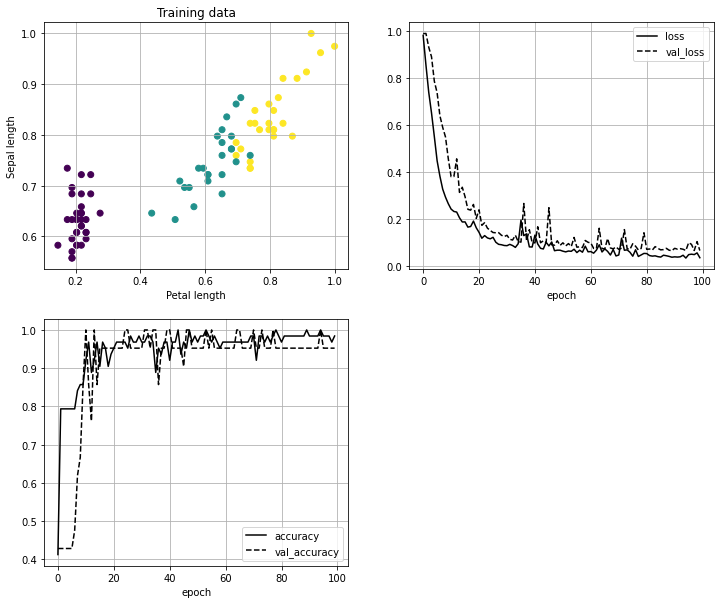

In [ ]:
# Program here by yourself
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)

plt.scatter(train_x[:,2],train_x[:,0],c=y_data[:num_train],
                cmap='viridis')
plt.title('Training data')
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.grid()

plt.subplot(2,2,2)
plt.plot(history.history['loss'],'k-',label ='loss')
plt.plot(history.history['val_loss'],'k--',label ='val_loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.subplot(2,2,3)
plt.plot(history.history['accuracy'],'k-',label ='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label ='val_accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()


### Programming (5): test performance & prediction
- print test performance {loss, accuracy}
- Compute the prediction for the sample of [7.7, 3.8, 6.7, 2.2]

In [ ]:
### Programming (5): 
print("\nModel performace with test data set")
model.evaluate(test_x,test_y,verbose=2)

sample = np.array([7.7,3.8,6.7,2.2])

class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']


norm=sample/max_samples
pred = model.predict(norm)
pred_class = np.argmax(pred)
print("sample = ", sample)
print("norm_sample",norm)
print("pred = ",pred)
print("pred_class =",class_names[pred_class])


Model performace with test data set
2/2 - 0s - loss: 0.0979 - accuracy: 0.9444
sample =  [7.7 3.8 6.7 2.2]
norm_sample [[0.97468353 0.86363634 0.97101448 0.88      ]]
pred =  [[1.5940580e-15 1.0576862e-04 9.9989426e-01]]
pred_class = Iris virginica


In [ ]:
!ls -ltr


total 8
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data
drwxr-xr-x 3 root root 4096 Apr  3 07:25 Iris_decision
